In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-slicing.csv


# ****Data Preperation

In [79]:
dataset = pd.read_csv("/kaggle/input/network-slicing.csv")

/tmp/ipykernel_33/1766243362.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/kaggle/input/network-slicing.csv")


In [81]:
print("Dataset Shape:", dataset.shape)

Dataset Shape: (466739, 9)


Dataset has approx 466 instances, 8 feature and 1 label

In [82]:
dataset.head(20)

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
0,Smartphone,1,LTE/5G,Monday,1,1,0.01,<50ms,eMBB
1,Smartphone,1,LTE/5G,Monday,1,2,0.01,<50ms,eMBB
2,Smartphone,1,LTE/5G,Monday,1,3,0.01,<50ms,eMBB
3,Smartphone,1,LTE/5G,Monday,1,4,0.01,<50ms,eMBB
4,Smartphone,1,LTE/5G,Monday,1,65,0.01,<50ms,eMBB
5,Smartphone,1,LTE/5G,Monday,1,66,0.01,<50ms,eMBB
6,Smartphone,1,LTE/5G,Monday,1,5,0.01,<50ms,eMBB
7,Smartphone,1,LTE/5G,Monday,1,6,0.01,<50ms,eMBB
8,Smartphone,1,LTE/5G,Monday,1,7,0.01,<50ms,eMBB
9,Smartphone,1,LTE/5G,Monday,1,8,0.01,<50ms,eMBB


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466739 entries, 0 to 466738
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Use CaseType (Input 1)          466739 non-null  object 
 1   LTE/5G UE Category (Input 2)    466739 non-null  object 
 2   Technology Supported (Input 3)  466739 non-null  object 
 3   Day (Input4)                    466739 non-null  object 
 4   Time (Input 5)                  466739 non-null  int64  
 5   QCI (Input 6)                   466739 non-null  int64  
 6   Packet Loss Rate (Reliability)  466739 non-null  float64
 7   Packet Delay Budget (Latency)   466739 non-null  object 
 8   Slice Type (Output)             466739 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.0+ MB


Converting selected columns in DataFrame into categorical codes

In [84]:
for col in ['Use CaseType (Input 1)', 'LTE/5G UE Category (Input 2)', 'Technology Supported (Input 3)', 'Day (Input4)', 'Packet Delay Budget (Latency)']:
    dataset[col] = dataset[col].astype('category').cat.codes

In [85]:
dataset.head(20)

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
0,7,0,1,1,1,1,0.01,2,eMBB
1,7,0,1,1,1,2,0.01,2,eMBB
2,7,0,1,1,1,3,0.01,2,eMBB
3,7,0,1,1,1,4,0.01,2,eMBB
4,7,0,1,1,1,65,0.01,2,eMBB
5,7,0,1,1,1,66,0.01,2,eMBB
6,7,0,1,1,1,5,0.01,2,eMBB
7,7,0,1,1,1,6,0.01,2,eMBB
8,7,0,1,1,1,7,0.01,2,eMBB
9,7,0,1,1,1,8,0.01,2,eMBB


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466739 entries, 0 to 466738
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Use CaseType (Input 1)          466739 non-null  int8   
 1   LTE/5G UE Category (Input 2)    466739 non-null  int8   
 2   Technology Supported (Input 3)  466739 non-null  int8   
 3   Day (Input4)                    466739 non-null  int8   
 4   Time (Input 5)                  466739 non-null  int64  
 5   QCI (Input 6)                   466739 non-null  int64  
 6   Packet Loss Rate (Reliability)  466739 non-null  float64
 7   Packet Delay Budget (Latency)   466739 non-null  int8   
 8   Slice Type (Output)             466739 non-null  object 
dtypes: float64(1), int64(2), int8(5), object(1)
memory usage: 16.5+ MB


Distribution of Label Data

In [87]:
dataset['Slice Type (Output)'].value_counts()

Slice Type (Output)
URLLC    209300
mMTC     131859
eMBB     125580
Name: count, dtype: int64

Plotting Distribution of Slice Type

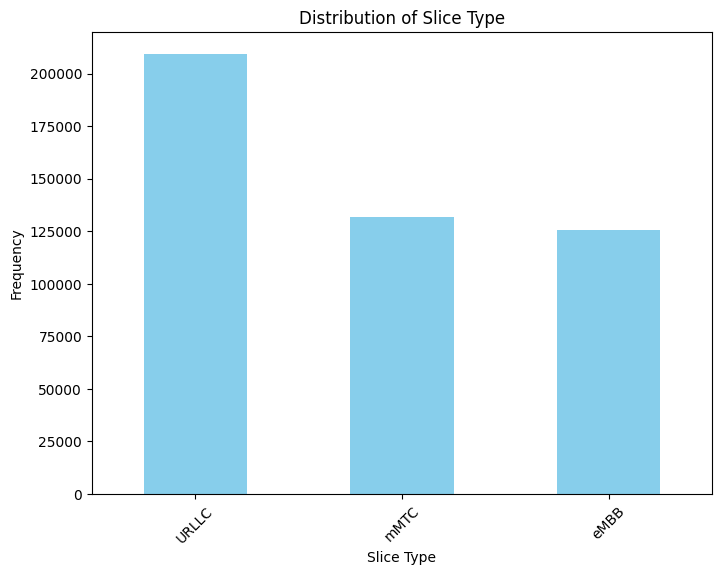

In [88]:
import matplotlib.pyplot as plt
# Plot the distribution of 'Slice Type (Output)'
plt.figure(figsize=(8, 6))
dataset['Slice Type (Output)'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Slice Type')
plt.xlabel('Slice Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Check if any nan data is included in columns.

In [89]:
print(dataset.isna().sum())

Use CaseType (Input 1)            0
LTE/5G UE Category (Input 2)      0
Technology Supported (Input 3)    0
Day (Input4)                      0
Time (Input 5)                    0
QCI (Input 6)                     0
Packet Loss Rate (Reliability)    0
Packet Delay Budget (Latency)     0
Slice Type (Output)               0
dtype: int64


Backup dataset

In [90]:
df = dataset

# ****EXPLORATORY DATA ANALYSIS (EDA)

In [91]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

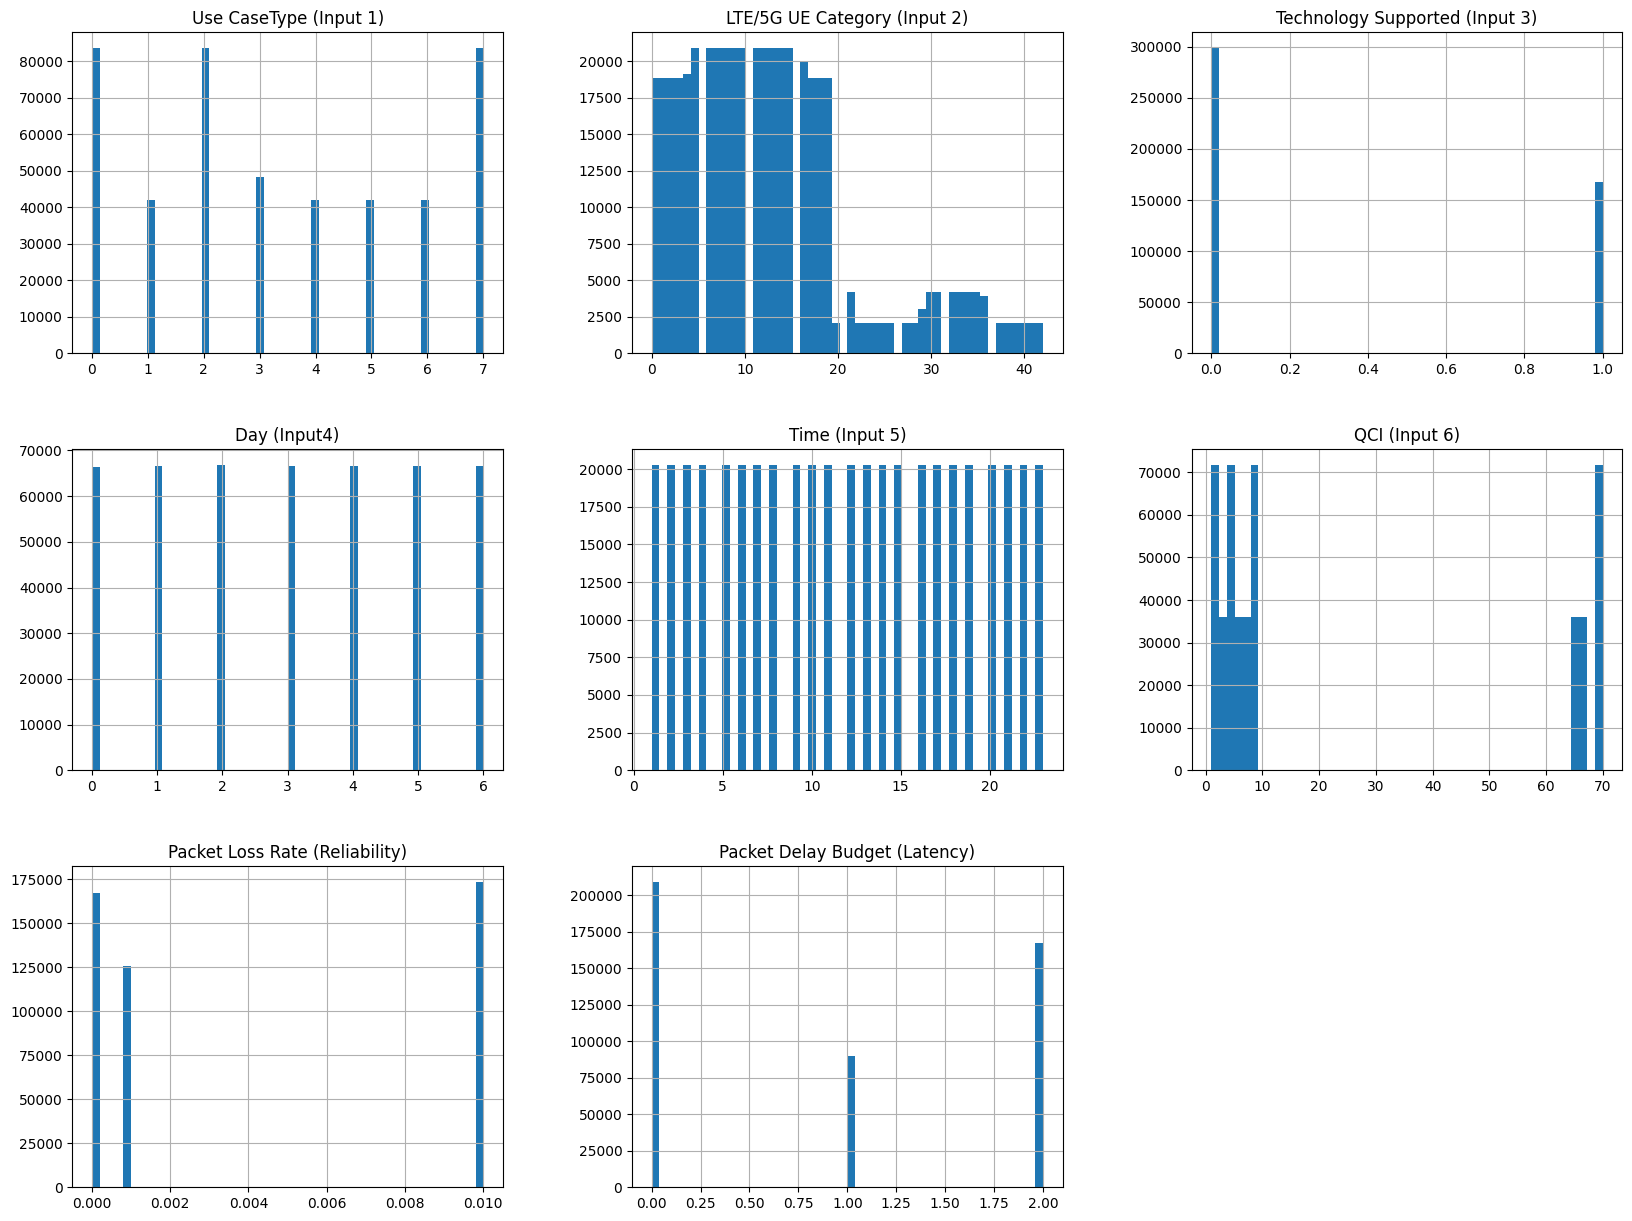

In [92]:
df.hist(bins=50, figsize=(20,15))
plt.show()

LTE/5g Category' Probabilistic Distribution with 'slice Type'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

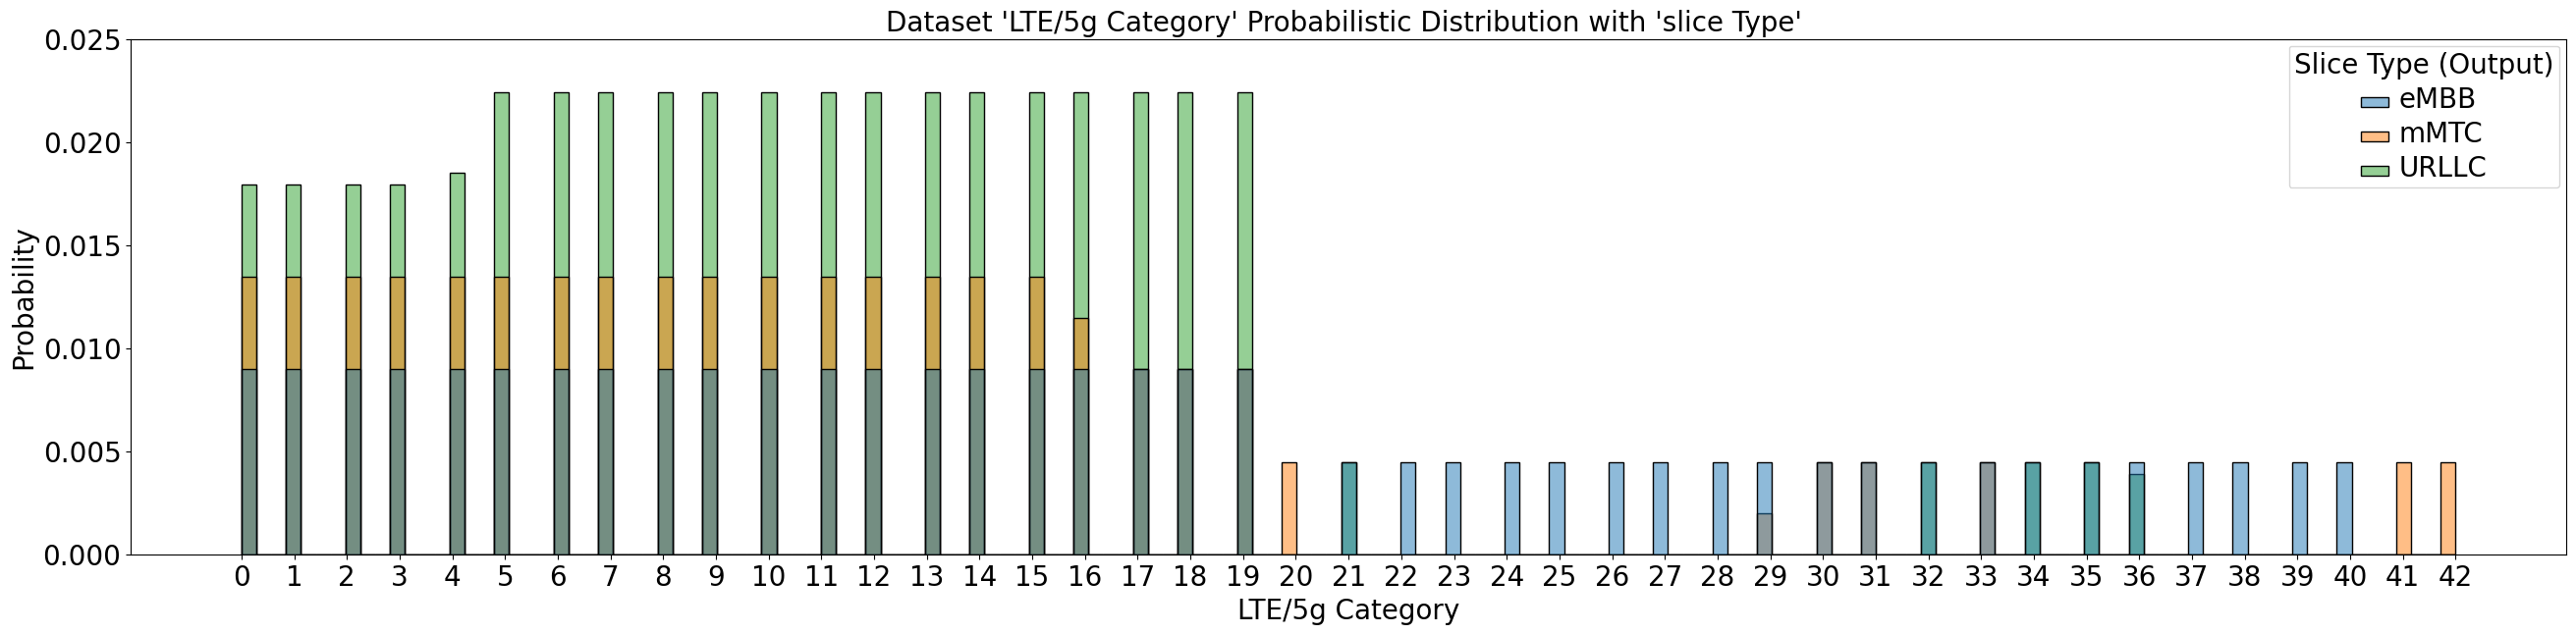

In [93]:
fig = plt.figure(figsize = (32,15))
plt.subplot(2,1,1)
plt.title("Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = dataset,x = "LTE/5G UE Category (Input 2)",stat = "probability",
                              hue = "Slice Type (Output)")

plt.xticks(dataset["LTE/5G UE Category (Input 2)"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.000,0.030,0.005),fontsize = 20);

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

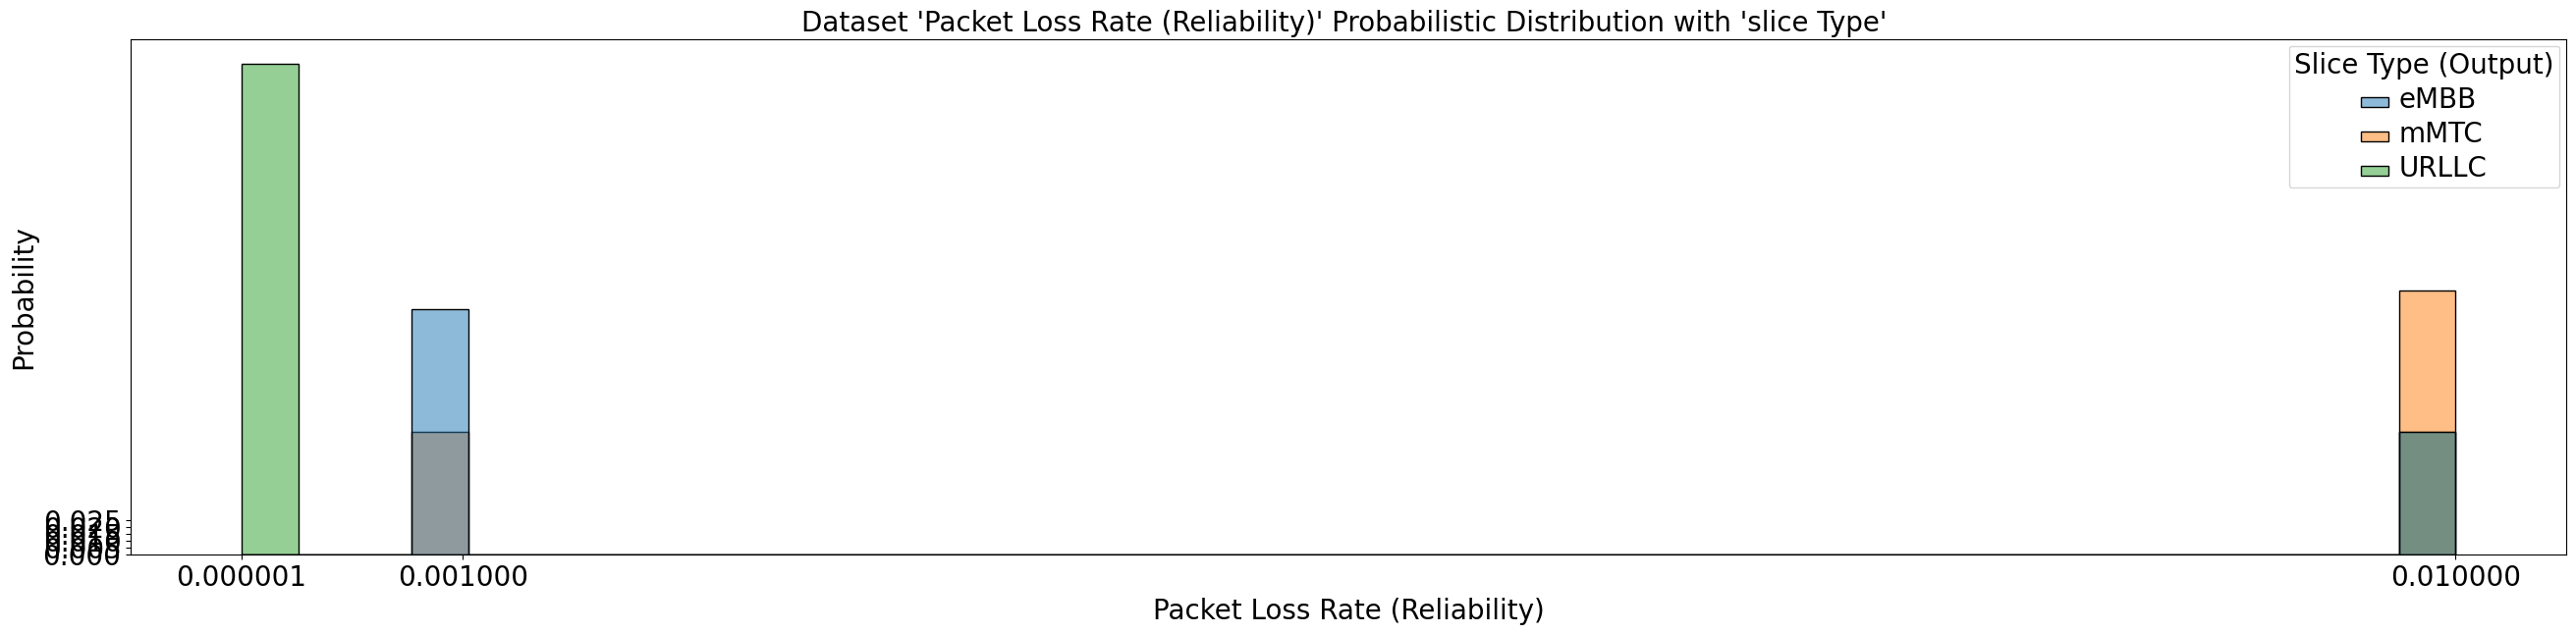

In [94]:
fig = plt.figure(figsize = (32,15))
plt.subplot(2,1,1)
plt.title("Dataset 'Packet Loss Rate (Reliability)' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = dataset,x = "Packet Loss Rate (Reliability)",stat = "probability",
                              hue = "Slice Type (Output)")

plt.xticks(dataset["Packet Loss Rate (Reliability)"].value_counts().index,fontsize = 20)
plt.xlabel("Packet Loss Rate (Reliability)",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.000,0.030,0.005),fontsize = 20);

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20');

# ****Feature Extraction

In [ ]:
df.describe()

Cramers_v to calculate Cramer's V statistic, which is used to measure the association between two categorical variables

In [95]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [96]:
# Calculate Cramer's V for all pairs of categorical variables
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for i in df.columns:
    for j in df.columns:
        corr_matrix.loc[i, j] = cramers_v(df[i], df[j])

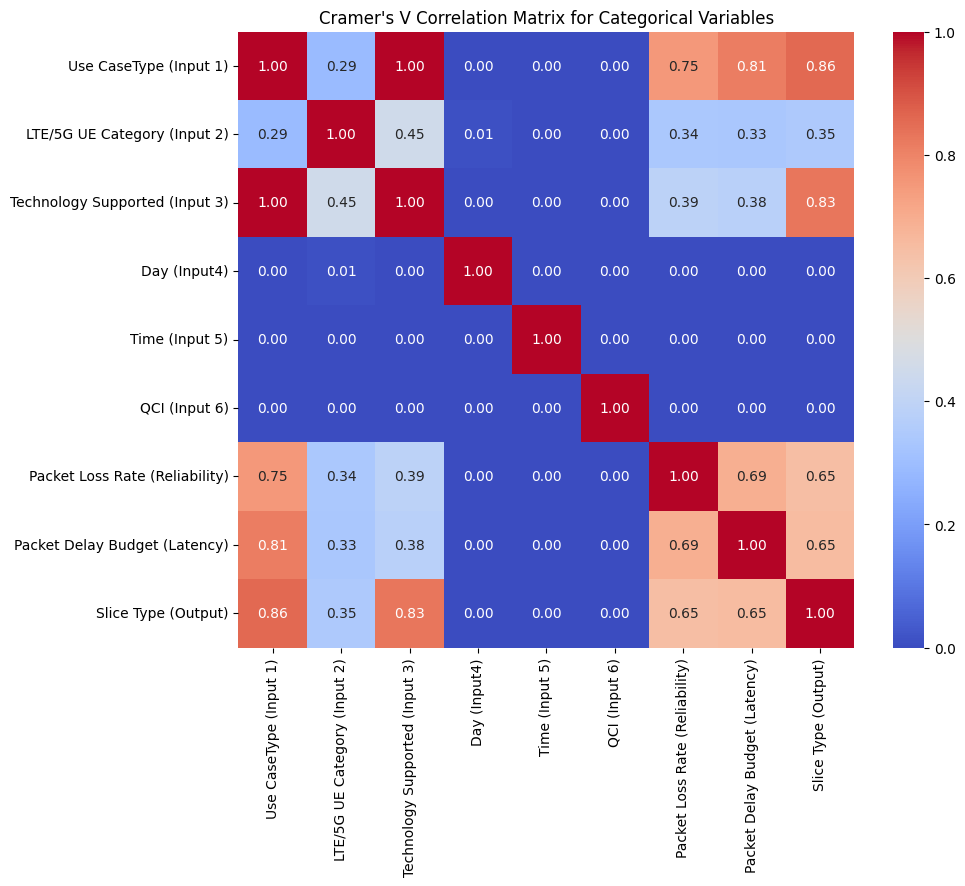

In [97]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Cramer\'s V Correlation Matrix for Categorical Variables')
plt.show()

# ****DATA PREPROCESSING

In [98]:
X=dataset.drop(['Slice Type (Output)'],axis=1)
y=dataset['Slice Type (Output)']

In [99]:
X

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
0,7,0,1,1,1,1,0.010000,2
1,7,0,1,1,1,2,0.010000,2
2,7,0,1,1,1,3,0.010000,2
3,7,0,1,1,1,4,0.010000,2
4,7,0,1,1,1,65,0.010000,2
...,...,...,...,...,...,...,...,...
466734,2,19,0,3,23,7,0.000001,0
466735,2,19,0,3,23,8,0.000001,0
466736,2,19,0,3,23,9,0.000001,0
466737,2,19,0,3,23,69,0.000001,0


In [100]:
y

0          eMBB
1          eMBB
2          eMBB
3          eMBB
4          eMBB
          ...  
466734    URLLC
466735    URLLC
466736    URLLC
466737    URLLC
466738    URLLC
Name: Slice Type (Output), Length: 466739, dtype: object

# ****TRAIN AND VALIDATION SPLITTING

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X.shape, y.shape

((466739, 8), (466739,))

In [103]:
# Split the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into testing (20%) and validation (10%) sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


In [104]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((326717, 8), (93814, 8), (46208, 8), (326717,), (93814,), (46208,))

In [ ]:
np.unique(y_train,return_counts=True)

In [105]:
np.unique(y_test,return_counts=True)

(array(['URLLC', 'eMBB', 'mMTC'], dtype=object), array([41929, 25337, 26548]))

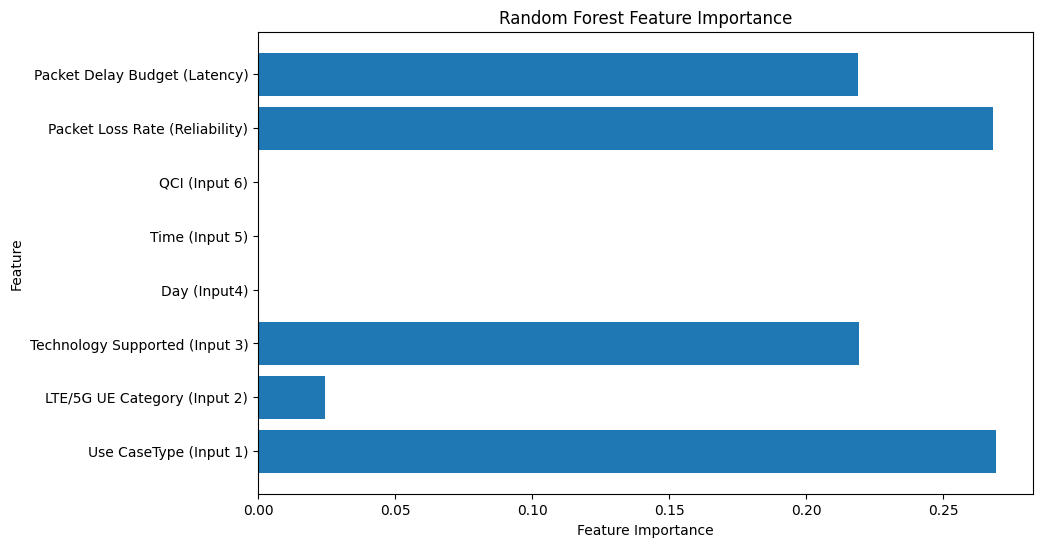

In [106]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
# 1. Feature Importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = rf_model.feature_importances_
rf_feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names, rf_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

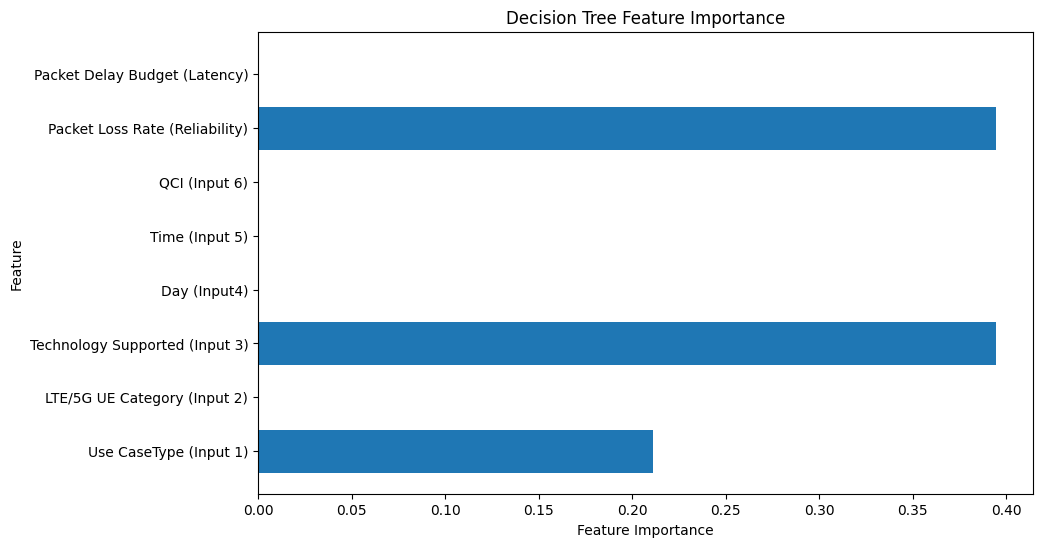

NameError: name 'DT_clf_F' is not defined

In [107]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances
dt_feature_importances = dt_model.feature_importances_
dt_feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(dt_feature_names, dt_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

feature_importances = DT_clf_F.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature relevance in descending order
print("Feature relevance (in descending order):")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")
feature_importances = DT_clf_F.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature relevance with names in descending order
print("Feature relevance (in descending order):")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {feature_names[idx]}: {feature_importances[idx]}")

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

logreg_model = LogisticRegression(max_iter=8000)
logreg_model.fit(X_train, y_train)

# Get coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

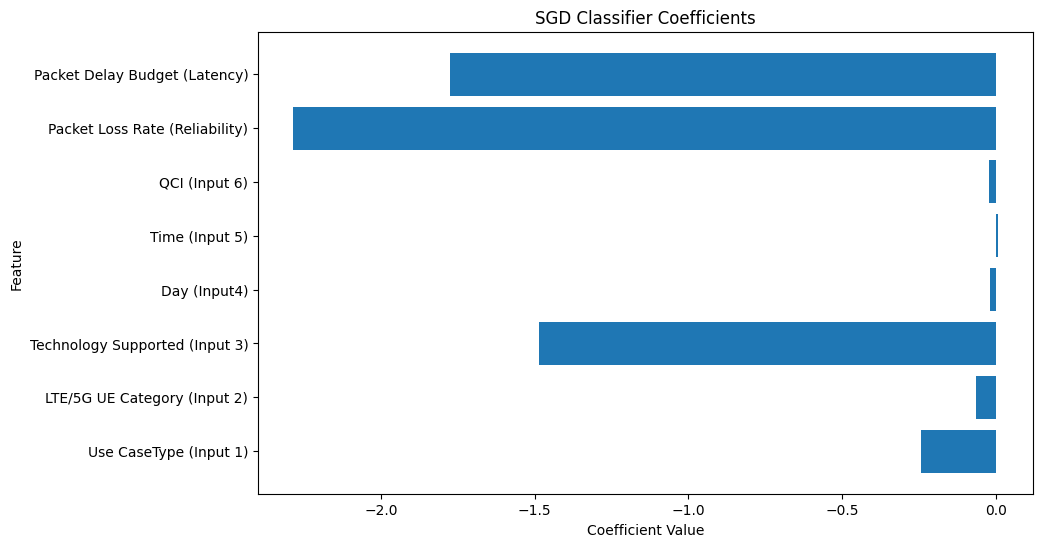

NameError: name 'sgd_clf_F' is not defined

In [108]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

sgd_model = SGDClassifier(loss='log_loss')
sgd_model.fit(X_train, y_train)

# Get coefficients and feature names
coefficients = sgd_model.coef_[0]
feature_names = X_train.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SGD Classifier Coefficients')
plt.show()

# Get the coefficients
coefficients = sgd_clf_F.coef_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Calculate feature correlations
feature_correlations = {}
for feature, coef in zip(feature_names, coefficients[0]):
    feature_correlations[feature] = coef

# Sort the feature correlations
sorted_feature_correlations = sorted(feature_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature correlations
for feature, correlation in sorted_feature_correlations:
    print(f"Feature: {feature}, Correlation: {correlation}")

# ****Classic Machine Learning Algorithm

In [109]:
X_train

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
407172,0,11,1,4,18,70,0.000001,0
322833,5,14,0,5,17,65,0.010000,1
422171,0,18,1,0,22,8,0.000001,0
22924,7,10,1,3,16,66,0.010000,2
130795,2,2,0,4,11,3,0.001000,2
...,...,...,...,...,...,...,...,...
259178,4,3,0,2,19,9,0.000001,0
365838,7,24,1,2,13,66,0.001000,0
131932,2,3,0,1,6,7,0.001000,2
146867,2,10,0,5,5,5,0.001000,2


In [110]:
X_test

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
29135,7,13,1,3,11,3,0.010000,2
140771,2,7,0,5,19,6,0.001000,2
134248,2,4,0,1,23,9,0.001000,2
178804,0,5,1,4,1,3,0.001000,2
181997,0,6,1,3,16,9,0.001000,2
...,...,...,...,...,...,...,...,...
209544,1,0,0,1,19,9,0.000001,0
251075,1,19,0,3,17,5,0.000001,0
99950,6,7,0,2,7,5,0.010000,2
164540,2,18,0,0,7,70,0.001000,2


In [111]:
y_train

407172    URLLC
322833     mMTC
422171    URLLC
22924      eMBB
130795     mMTC
          ...  
259178    URLLC
365838     eMBB
131932     mMTC
146867     mMTC
121958    URLLC
Name: Slice Type (Output), Length: 326717, dtype: object

Dropping Non Important Features

In [112]:
#columnsToDrop_LR = ["QCI (Input 6)", "Time (Input 5)", "Day (Input4)", "LTE/5G UE Category (Input 2)","Use CaseType (Input 1)"]
columnsToDrop = ["QCI (Input 6)", "Time (Input 5)", "Day (Input4)", "LTE/5G UE Category (Input 2)"]

In [113]:
new_X_train = X_train.drop(columnsToDrop,axis=1)
new_X_test = X_test.drop(columnsToDrop,axis=1)
new_X_val = X_val.drop(columnsToDrop,axis=1)
#new_X_train_LR = X_train.drop(columnsToDrop_LR,axis=1)
#new_X_test_LR = X_test.drop(columnsToDrop_LR,axis=1)
#new_X_val_LR = X_val.drop(columnsToDrop_LR,axis=1)

In [114]:
new_X_train

,Use CaseType (Input 1),Technology Supported (Input 3),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
407172,0,1,0.000001,0
322833,5,0,0.010000,1
422171,0,1,0.000001,0
22924,7,1,0.010000,2
130795,2,0,0.001000,2
...,...,...,...,...
259178,4,0,0.000001,0
365838,7,1,0.001000,0
131932,2,0,0.001000,2
146867,2,0,0.001000,2


In [115]:
new_X_val

,Use CaseType (Input 1),Technology Supported (Input 3),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
222046,1,0,0.000001,0
347262,7,1,0.001000,0
33130,7,1,0.010000,2
39670,7,1,0.010000,2
268849,4,0,0.000001,0
...,...,...,...,...
373960,7,1,0.001000,0
44799,3,0,0.010000,1
128780,2,0,0.001000,2
112778,6,0,0.010000,2


Defining Required Functions

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [118]:
def conf_matrix_plot(cm, text):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix: " + text)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [119]:
from sklearn.model_selection import  cross_val_score 

In [120]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

SGD Classifier

In [121]:
import time
from sklearn.linear_model import SGDClassifier
sgd_clf_F = SGDClassifier(random_state=42, max_iter=5000)
sgd_clf = SGDClassifier(random_state=42, max_iter=5000)

In [122]:
start_time = time.time()
sgd_clf_F.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 22.96199059486389 seconds


In [123]:
y_pred_F=sgd_clf_F.predict(X_test)

In [124]:
y_pred_F

array(['eMBB', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'URLLC'], dtype='<U5')

In [125]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()

accuracy = accuracy_score(y_test, y_pred_F)
precision = precision_score(y_test, y_pred_F, average='weighted')
recall = recall_score(y_test, y_pred_F, average='weighted')
f1 = f1_score(y_test, y_pred_F, average='weighted')

end_time = time.time()

inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.8725669942652483
Precision: 0.8818098104406801
Recall: 0.8725669942652483
F1 Score: 0.8739008030332414
Inference Time: 3.3768203258514404 seconds


In [23]:
accuracy_scores = cross_val_score(sgd_clf_F, X_train, y_train,scoring="accuracy", cv=10)
display_scores(accuracy_scores)

#precision_scores = cross_val_score(sgd_clf_F, X_train, y_train, scoring="precision_macro", cv=10)
#display_scores(precision_scores)

#recall_scores = cross_val_score(sgd_clf_F, X_train, y_train, scoring="recall_macro", cv=10)
#display_scores(recall_scores)

#f1_scores = cross_val_score(sgd_clf_F, X_train, y_train, scoring="f1_macro", cv=10)
#display_scores(f1_scores)

Scores: [0.8509427  0.82045788 0.89973066 0.8678073  0.90508692 0.84001592
 0.84414789 0.85231551 0.86676257 0.90336996]
Mean: 0.8650637317826965
Standard deviation: 0.027745088970734185


In [24]:
new_X_train

,Use CaseType (Input 1),Technology Supported (Input 3),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
407172,0,1,0.000001,0
322833,5,0,0.010000,1
422171,0,1,0.000001,0
22924,7,1,0.010000,2
130795,2,0,0.001000,2
...,...,...,...,...
259178,4,0,0.000001,0
365838,7,1,0.001000,0
131932,2,0,0.001000,2
146867,2,0,0.001000,2


In [126]:
start_time = time.time()
sgd_clf.fit(new_X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 3.12188982963562 seconds


In [127]:
y_pred=sgd_clf.predict(new_X_test)

In [128]:
y_pred

array(['eMBB', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'URLLC'], dtype='<U5')

In [129]:
start_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred,average='weighted')

recall = recall_score(y_test, y_pred,average='weighted')

f1 = f1_score(y_test, y_pred,average='weighted')

end_time = time.time()

inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.9105250815443324
Precision: 0.9320193424772175
Recall: 0.9105250815443324
F1 Score: 0.9116559620167541
Inference Time: 3.4743967056274414 seconds


In [29]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd_clf, new_X_train, y_train,scoring="accuracy", cv=10)
display_scores(accuracy_scores)

#precision_scores = cross_val_score(sgd_clf, new_X_train, y_train, scoring="precision_macro", cv=10)
#display_scores(precision_scores)

#recall_scores = cross_val_score(sgd_clf, new_X_train, y_train, scoring="recall_macro", cv=10)
#display_scores(recall_scores)

#f1_scores = cross_val_score(sgd_clf, new_X_train, y_train, scoring="f1_macro", cv=10)
#display_scores(f1_scores)

Scores: [0.90970862 0.91157566 0.90888222 0.90915769 0.91117777 0.90882101
 0.91194295 0.91040984 0.90921612 0.91007315]
Mean: 0.9100965037313955
Standard deviation: 0.001085052118519827


In [130]:
#y_pred_val=sgd_clf_F.predict(X_val)
y_pred_val=sgd_clf.predict(new_X_val)

In [131]:
start_time = time.time()

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)

# Calculate precision
precision = precision_score(y_val, y_pred_val,average='weighted')

# Calculate recall
recall = recall_score(y_val, y_pred_val,average='weighted')

# Calculate F1 score
f1 = f1_score(y_val, y_pred_val,average='weighted')

# End time
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.9114222645429363
Precision: 0.9326103114850064
Recall: 0.9114222645429363
F1 Score: 0.9125972712557239
Inference Time: 1.5933520793914795 seconds


In [32]:
# L2 regularization (Ridge)
sgd_clf_regul = SGDClassifier(random_state=42, max_iter=5000, penalty='l2', alpha=0.0001)

sgd_clf_regul.fit(new_X_train, y_train)

accuracy = sgd_clf_regul.score(new_X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.9114222645429363


In [33]:
scores = cross_val_score(sgd_clf_regul, new_X_train, y_train,scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.90970862 0.91157566 0.90888222 0.90915769 0.91117777 0.90882101
 0.91194295 0.91040984 0.90921612 0.91007315]
Mean: 0.9100965037313955
Standard deviation: 0.001085052118519827


In [132]:
# Compute confusion matrix
cm_F = confusion_matrix(y_val, y_pred_val)

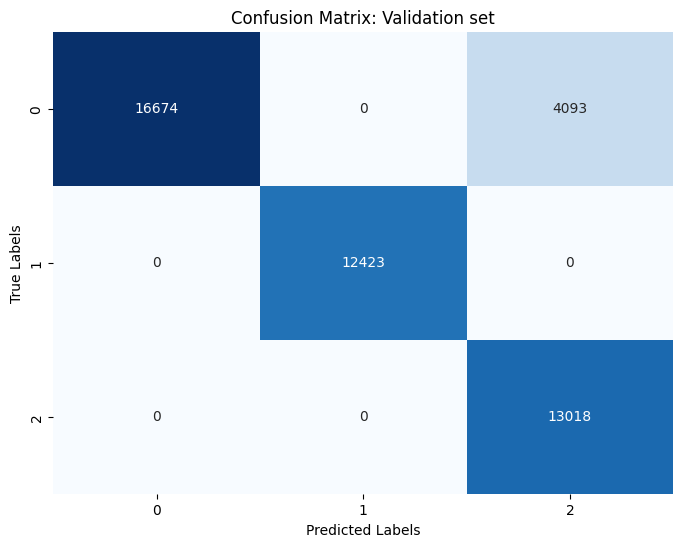

In [133]:
conf_matrix_plot(cm_F, "Validation set")

Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
LR_clf_F=LogisticRegression(max_iter=8000)
LR_clf=LogisticRegression(max_iter=8000)

In [135]:
start_time = time.time()
LR_clf_F.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 382.05745911598206 seconds


In [136]:
start_time = time.time()
LR_clf.fit(new_X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 21.35583758354187 seconds


Feature Importance for Logistic Regression

In [ ]:
from sklearn.feature_selection import RFE
# Initialize RFE selector
selector = RFE(LR_clf_F, n_features_to_select=1)

# Fit RFE selector
selector.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = selector.ranking_

# Get the indices of features sorted by their importance
sorted_indices = feature_ranking.argsort()

# Print the features in order of importance
print("Most relevant features (in order of importance):")
for idx in sorted_indices:
    column_name = X_train.columns[idx]
    print(f"Feature {column_name}: {X_train[column_name]}")

In [137]:
y_pred_F=LR_clf_F.predict(X_test)

In [138]:
y_pred_F

array(['eMBB', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'URLLC'], dtype=object)

In [139]:
start_time = time.time()
accuracy = accuracy_score(y_test, y_pred_F)

precision = precision_score(y_test, y_pred_F,average='weighted')

recall = recall_score(y_test, y_pred_F,average='weighted')

f1 = f1_score(y_test, y_pred_F,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.8372524356705822
Precision: 0.839341699409894
Recall: 0.8372524356705822
F1 Score: 0.8380149226740461
Inference Time: 5.188778400421143 seconds


In [140]:
y_pred=LR_clf.predict(new_X_test)

In [141]:
y_pred

array(['eMBB', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'URLLC'], dtype=object)

In [142]:
start_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred,average='weighted')

recall = recall_score(y_test, y_pred,average='weighted')

f1 = f1_score(y_test, y_pred,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.8216364295307736
Precision: 0.8217046611362
Recall: 0.8216364295307736
F1 Score: 0.8216701836408523
Inference Time: 5.119051694869995 seconds


In [143]:
y_pred_val=LR_clf.predict(new_X_val)

In [144]:
start_time = time.time()

accuracy = accuracy_score(y_val, y_pred_val)

precision = precision_score(y_val, y_pred_val,average='weighted')

recall = recall_score(y_val, y_pred_val,average='weighted')

f1 = f1_score(y_val, y_pred_val,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

Accuracy: 0.821935595567867
Precision: 0.8218295081310532
Recall: 0.821935595567867
F1 Score: 0.8218816812905961
Inference Time: 2.391575336456299 seconds


In [146]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

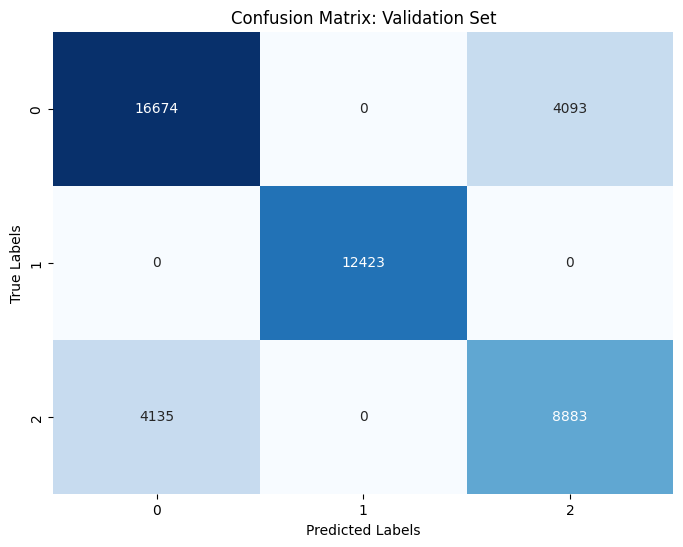

In [147]:
conf_matrix_plot(cm, "Validation Set")

Hyperparameter Tuning

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],             # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']      # Solver algorithm
}

In [ ]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(estimator=LR_clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform Grid Search Cross Validation
#grid_search.fit(new_X_train, y_train)

In [ ]:
#print("Best Parameters:", grid_search.best_params_)

In [ ]:
#best_model = grid_search.best_estimator_

In [ ]:
#test_accuracy = best_model.score(new_X_test, y_test)
#print("Test Accuracy:", test_accuracy)

In [ ]:
#validation_accuracy = best_model.score(new_X_val, y_test)
#print("Validation Accuracy:", validation_accuracy)

Decision Tree

In [ ]:
from sklearn import tree
DT_clf_F=tree.DecisionTreeClassifier(ccp_alpha=0.14)
DT_clf=tree.DecisionTreeClassifier(ccp_alpha=0.14)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_val.shape

In [ ]:
start_time = time.time()
DT_clf_F.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

In [ ]:
start_time = time.time()
DT_clf.fit(new_X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

In [ ]:
y_pred_F=DT_clf_F.predict(X_test)

In [ ]:
y_pred_F

In [ ]:
start_time = time.time()
accuracy = accuracy_score(y_test, y_pred_F)

precision = precision_score(y_test, y_pred_F,average='weighted')

recall = recall_score(y_test, y_pred_F,average='weighted')

f1 = f1_score(y_test, y_pred_F,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(DT_clf_F, X_train, y_train,scoring="accuracy", cv=10)
display_scores(accuracy_scores)

#precision_scores = cross_val_score(DT_clf_F, X_train, y_train, scoring="precision_macro", cv=10)
#display_scores(precision_scores)

#recall_scores = cross_val_score(DT_clf_F, X_train, y_train, scoring="recall_macro", cv=10)
#display_scores(recall_scores)

#f1_scores = cross_val_score(DT_clf_F, X_train, y_train, scoring="f1_macro", cv=10)
#display_scores(f1_scores)

In [ ]:
y_pred=DT_clf.predict(new_X_test)

In [ ]:
y_pred

In [ ]:
start_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred,average='weighted')

recall = recall_score(y_test, y_pred,average='weighted')

f1 = f1_score(y_test, y_pred,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(DT_clf, new_X_train, y_train,scoring="accuracy", cv=10)
display_scores(accuracy_scores)

#precision_scores = cross_val_score(DT_clf, new_X_train, y_train, scoring="precision_macro", cv=10)
#display_scores(precision_scores)

#recall_scores = cross_val_score(DT_clf, new_X_train, y_train, scoring="recall_macro", cv=10)
#display_scores(recall_scores)

#f1_scores = cross_val_score(DT_clf, new_X_train, y_train, scoring="f1_macro", cv=10)
#display_scores(f1_scores)

In [ ]:
y_pred_val=DT_clf_F.predict(X_val)

In [ ]:
y_pred_val

In [ ]:
start_time = time.time()
accuracy = accuracy_score(y_val, y_pred_val)

precision = precision_score(y_val, y_pred_val,average='weighted')

recall = recall_score(y_val, y_pred_val,average='weighted')

f1 = f1_score(y_val, y_pred_val,average='weighted')

end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

In [ ]:
# Compute confusion matrix
cm_F = confusion_matrix(y_val, y_pred_val)
conf_matrix_plot(cm_F, "All Features validation Set")

Experiment with Pruning

In [ ]:
ccp_alphas = np.linspace(0.10, 0.16, 5)
cv_scores_mean = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Iterate over each value of ccp_alpha
for ccp_alpha in ccp_alphas:
    # Create a Decision Tree classifier with current ccp_alpha value
    DT_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    
    # Perform cross-validation and compute mean accuracy
    cv_scores = cross_val_score(DT_clf, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_scores.mean())

    # Print accuracy for the current ccp_alpha
    print(f"Accuracy for ccp_alpha={ccp_alpha}: {cv_scores.mean()}")

In [ ]:
# Find the best value of ccp_alpha that maximizes cross-validation accuracy
best_ccp_alpha = ccp_alphas[np.argmax(cv_scores_mean)]
print("Best ccp_alpha:", best_ccp_alpha)

In [ ]:
# Train the final model using the desired ccp_alpha
final_DT_clf = DecisionTreeClassifier(ccp_alpha=0.14500000000000002)
final_DT_clf.fit(X_train, y_train)

In [ ]:
# Predictions on the val set
y_pred_fin = final_DT_clf.predict(X_val)

In [ ]:
# Calculate accuracy score on the test set
accuracy = accuracy_score(y_val, y_pred_fin)

print("Accuracy on the validation set with desired ccp_alpha:", accuracy)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf_F = SGDClassifier(random_state=42, max_iter=5000)
sgd_clf = SGDClassifier(random_state=42, max_iter=5000)

In [ ]:
start_time = time.time()
sgd_clf_F.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

In [ ]:
y_pred_F=sgd_clf_F.predict(X_test)

In [ ]:
y_pred_F

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()

accuracy = accuracy_score(y_test, y_pred_F)
precision = precision_score(y_test, y_pred_F, average='weighted')
recall = recall_score(y_test, y_pred_F, average='weighted')
f1 = f1_score(y_test, y_pred_F, average='weighted')

end_time = time.time()

inference_time = end_time - start_time

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Inference Time:", inference_time, "seconds")

# Deep Learning Model****

In [148]:
dataset

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
0,7,0,1,1,1,1,0.010000,2,eMBB
1,7,0,1,1,1,2,0.010000,2,eMBB
2,7,0,1,1,1,3,0.010000,2,eMBB
3,7,0,1,1,1,4,0.010000,2,eMBB
4,7,0,1,1,1,65,0.010000,2,eMBB
...,...,...,...,...,...,...,...,...,...
466734,2,19,0,3,23,7,0.000001,0,URLLC
466735,2,19,0,3,23,8,0.000001,0,URLLC
466736,2,19,0,3,23,9,0.000001,0,URLLC
466737,2,19,0,3,23,69,0.000001,0,URLLC


In [149]:
X

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
0,7,0,1,1,1,1,0.010000,2
1,7,0,1,1,1,2,0.010000,2
2,7,0,1,1,1,3,0.010000,2
3,7,0,1,1,1,4,0.010000,2
4,7,0,1,1,1,65,0.010000,2
...,...,...,...,...,...,...,...,...
466734,2,19,0,3,23,7,0.000001,0
466735,2,19,0,3,23,8,0.000001,0
466736,2,19,0,3,23,9,0.000001,0
466737,2,19,0,3,23,69,0.000001,0


In [150]:
y

0          eMBB
1          eMBB
2          eMBB
3          eMBB
4          eMBB
          ...  
466734    URLLC
466735    URLLC
466736    URLLC
466737    URLLC
466738    URLLC
Name: Slice Type (Output), Length: 466739, dtype: object

In [151]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode the target variable 'y' using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one-hot encoding to the encoded target variable
y_one_hot = to_categorical(y_encoded)

In [152]:
y_one_hot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [153]:
# Split the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

# Split the temporary set into testing (20%) and validation (10%) sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [154]:
X_train.shape

(326717, 8)

In [155]:
X_test.shape

(93814, 8)

In [156]:
X_val.shape

(46208, 8)

In [157]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
num_input_features = 8

In [159]:
def plot_accuracy_and_loss():

    # Extracting training history
    training_loss = history.history['loss']
    training_accuracy = history.history['accuracy']
    validation_loss = history.history['val_loss']
    validation_accuracy = history.history['val_accuracy']
    epochs = range(1, len(training_loss) + 1)

    # Plotting loss
    plt.plot(epochs, training_loss, 'b', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting accuracy
    plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Leaky ReLU

In [160]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, LeakyReLU

num_input_features = 8

# Define the model
model_LeakyReLU_F = Sequential([
    Flatten(input_shape=(num_input_features,)),  # Flatten layer to flatten the input
    Dense(300, kernel_initializer="he_normal"),
    LeakyReLU(),
    Dense(100, kernel_initializer="he_normal"),
    LeakyReLU(),
    Dense(3, activation="softmax")
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [161]:
model_LeakyReLU_F.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,103 (129.31 KB)

 Trainable params: 33,103 (129.31 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model_LeakyReLU_F.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [164]:
history_LeakyReLU_F = model_LeakyReLU_F.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9033 - loss: 0.2353 - val_accuracy: 0.9318 - val_loss: 0.1521
Epoch 2/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9426 - loss: 0.1540 - val_accuracy: 0.9605 - val_loss: 0.1008
Epoch 3/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9642 - loss: 0.1081 - val_accuracy: 0.9775 - val_loss: 0.0703
Epoch 4/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9808 - loss: 0.0677 - val_accuracy: 0.9888 - val_loss: 0.0486
Epoch 5/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9885 - loss: 0.0553 - val_accuracy: 0.9946 - val_loss: 0.0334
Epoch 6/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9946 - loss: 0.0328 - val_accuracy: 0.9967 - val_loss: 0.0230
Epoch 7/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9971 - loss: 0.0218 - val_accuracy: 0.9981 - val_loss: 0.0165
Epoch 8/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

In [165]:
# Evaluate the model on test data
test_loss, test_accuracy = model_LeakyReLU_F.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on validation data
val_loss, val_accuracy = model_LeakyReLU_F.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9999 - loss: 0.0080
Test Loss: 0.007984587922692299
Test Accuracy: 0.9998507499694824
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9999 - loss: 0.0079
Validation Loss: 0.007999970577657223
Validation Accuracy: 0.999848484992981


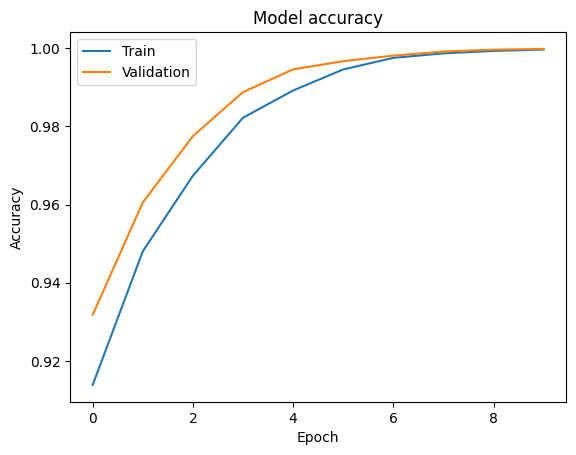

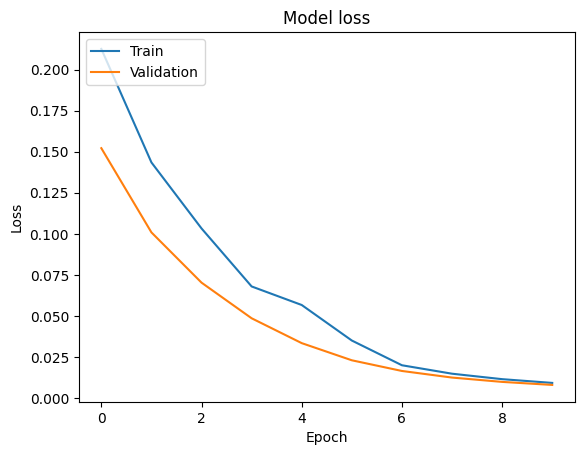

In [166]:
# Plot training & validation accuracy values
plt.plot(history_LeakyReLU_F.history['accuracy'])
plt.plot(history_LeakyReLU_F.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_LeakyReLU_F.history['loss'])
plt.plot(history_LeakyReLU_F.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()